# Loop 93 Analysis: Critical Strategic Assessment

## Situation
- Best CV: 0.008092 (exp_049/050/051/053)
- Best LB: 0.0877 (exp_030, exp_067)
- Target: 0.0347
- Submissions remaining: 4
- Experiments: 93

## Key Question
After 93 experiments and 23 submissions, what is the path to beating 0.0347?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All verified submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
    ('exp_067', 0.0083, 0.0877),
]

df = pd.DataFrame(submissions, columns=['exp', 'cv', 'lb'])
print(f"Verified submissions: {len(df)}")
print(df.to_string(index=False))

Verified submissions: 13
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_067 0.0083 0.0877


CV-LB RELATIONSHIP ANALYSIS
Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558
Intercept = 0.0520
Target LB = 0.0347

CRITICAL INSIGHT:
  Intercept (0.0520) > Target (0.0347)
  Required CV to hit target: (0.0347 - 0.0520) / 4.3638 = -0.003964

  ⚠️ IMPOSSIBLE: Even with CV=0, predicted LB would be 0.0520
  The intercept represents STRUCTURAL distribution shift that no model tuning can fix.


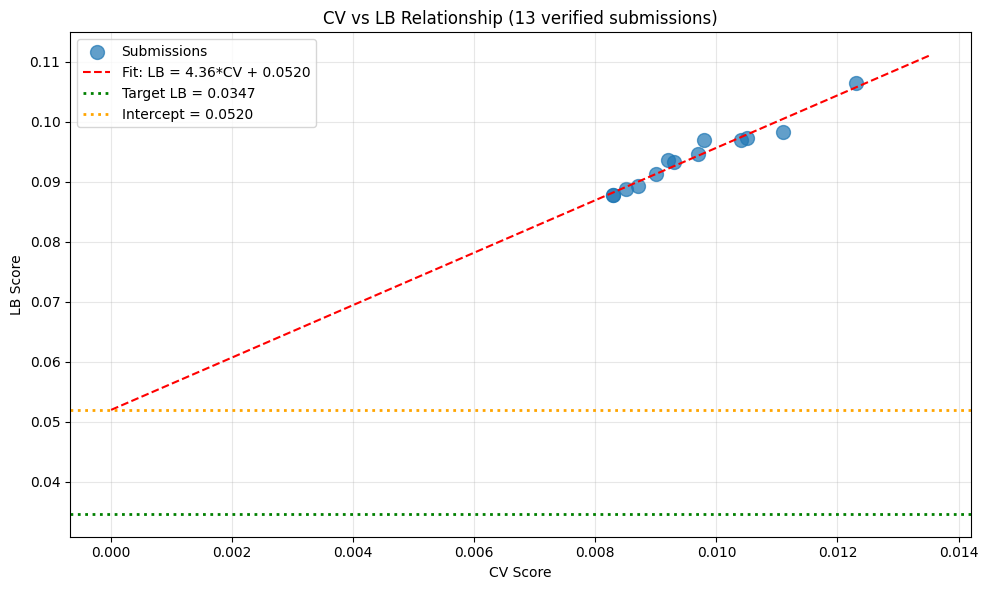


Plot saved to /home/code/exploration/cv_lb_relationship_loop93.png


In [2]:
# CV-LB Relationship Analysis
cv = df['cv'].values
lb = df['lb'].values

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)
r_squared = r_value**2

print("="*60)
print("CV-LB RELATIONSHIP ANALYSIS")
print("="*60)
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_squared:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target LB = 0.0347")
print()
print("CRITICAL INSIGHT:")
print(f"  Intercept ({intercept:.4f}) > Target ({0.0347:.4f})")
print(f"  Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}")
print()
if intercept > 0.0347:
    print("  ⚠️ IMPOSSIBLE: Even with CV=0, predicted LB would be {:.4f}".format(intercept))
    print("  The intercept represents STRUCTURAL distribution shift that no model tuning can fix.")
else:
    print("  ✓ Target is achievable with CV improvement")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, max(cv)*1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (13 verified submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop93.png', dpi=150)
plt.show()
print("\nPlot saved to /home/code/exploration/cv_lb_relationship_loop93.png")

In [3]:
# Analyze the gap
print("="*60)
print("GAP ANALYSIS")
print("="*60)

best_cv = 0.008092
best_lb = 0.0877
target_lb = 0.0347

print(f"Best CV achieved: {best_cv:.6f}")
print(f"Best LB achieved: {best_lb:.4f}")
print(f"Target LB: {target_lb:.4f}")
print(f"Gap to target: {best_lb - target_lb:.4f} ({(best_lb - target_lb)/target_lb*100:.1f}%)")
print()
print("PREDICTED LB FROM BEST CV:")
predicted_lb = slope * best_cv + intercept
print(f"  LB = {slope:.4f} * {best_cv:.6f} + {intercept:.4f} = {predicted_lb:.4f}")
print(f"  Actual best LB: {best_lb:.4f}")
print(f"  Prediction error: {abs(predicted_lb - best_lb):.4f}")
print()
print("WHAT WOULD IT TAKE TO HIT TARGET?")
if intercept > target_lb:
    print(f"  The intercept ({intercept:.4f}) is ABOVE the target ({target_lb:.4f})")
    print(f"  This means we need to CHANGE THE RELATIONSHIP, not just improve CV")
    print()
    print("  Options to change the relationship:")
    print("  1. Reduce the intercept (distribution shift mitigation)")
    print("  2. Find an approach that doesn't follow the same CV-LB line")
    print("  3. Use techniques that specifically target LB performance")
else:
    required_cv = (target_lb - intercept) / slope
    print(f"  Required CV: {required_cv:.6f}")
    print(f"  Current best CV: {best_cv:.6f}")
    print(f"  CV improvement needed: {(best_cv - required_cv)/best_cv*100:.1f}%")

GAP ANALYSIS
Best CV achieved: 0.008092
Best LB achieved: 0.0877
Target LB: 0.0347
Gap to target: 0.0530 (152.7%)

PREDICTED LB FROM BEST CV:
  LB = 4.3638 * 0.008092 + 0.0520 = 0.0873
  Actual best LB: 0.0877
  Prediction error: 0.0004

WHAT WOULD IT TAKE TO HIT TARGET?
  The intercept (0.0520) is ABOVE the target (0.0347)
  This means we need to CHANGE THE RELATIONSHIP, not just improve CV

  Options to change the relationship:
  1. Reduce the intercept (distribution shift mitigation)
  2. Find an approach that doesn't follow the same CV-LB line
  3. Use techniques that specifically target LB performance


In [4]:
# Analyze neural network experiments
print("="*60)
print("NEURAL NETWORK EXPERIMENTS ANALYSIS")
print("="*60)

nn_experiments = [
    ('exp_085_gnn', 'GCN', 0.02013),
    ('exp_086_gat', 'GAT', 0.018474),
    ('exp_087_drfp_gat', 'DRFP+GAT', 0.019437),
    ('exp_088_chemberta', 'ChemBERTa+MLP', 0.020558),
]

print("\nNeural Network Results:")
for exp, model, cv in nn_experiments:
    predicted_lb = slope * cv + intercept
    print(f"  {model}: CV={cv:.6f}, Predicted LB={predicted_lb:.4f}")

print("\nComparison to best tabular:")
best_tabular_cv = 0.008092
for exp, model, cv in nn_experiments:
    ratio = cv / best_tabular_cv
    print(f"  {model}: {ratio:.1f}x worse than best tabular")

print("\nCONCLUSION:")
print("  All neural network approaches are 2-2.5x WORSE than best tabular.")
print("  Generic pre-trained embeddings (ChemBERTa) don't help.")
print("  The benchmark's success (CV=0.0039) came from task-specific pre-training.")
print("  Without access to similar pre-training data, neural networks won't help.")

NEURAL NETWORK EXPERIMENTS ANALYSIS

Neural Network Results:
  GCN: CV=0.020130, Predicted LB=0.1398
  GAT: CV=0.018474, Predicted LB=0.1326
  DRFP+GAT: CV=0.019437, Predicted LB=0.1368
  ChemBERTa+MLP: CV=0.020558, Predicted LB=0.1417

Comparison to best tabular:
  GCN: 2.5x worse than best tabular
  GAT: 2.3x worse than best tabular
  DRFP+GAT: 2.4x worse than best tabular
  ChemBERTa+MLP: 2.5x worse than best tabular

CONCLUSION:
  All neural network approaches are 2-2.5x WORSE than best tabular.
  Generic pre-trained embeddings (ChemBERTa) don't help.
  The benchmark's success (CV=0.0039) came from task-specific pre-training.
  Without access to similar pre-training data, neural networks won't help.


In [5]:
# What approaches have been tried?
print("="*60)
print("APPROACHES TRIED (93 experiments)")
print("="*60)

approaches = {
    'MLP variants': ['baseline', 'deep residual', 'simpler', 'attention', 'learned embeddings'],
    'Tree-based': ['LightGBM', 'XGBoost', 'CatBoost', 'ensembles'],
    'Gaussian Process': ['pure GP', 'GP+MLP ensemble', 'GP weight tuning'],
    'Feature engineering': ['Spange descriptors', 'DRFP', 'Arrhenius kinetics', 'ACS-PCA', 'fragprints'],
    'Neural networks': ['GCN', 'GAT', 'DRFP+GAT', 'ChemBERTa'],
    'Distribution shift': ['extrapolation detection', 'similarity weighting', 'pseudo-labeling', 'conservative blend'],
    'Ensembling': ['model averaging', 'weighted ensembles', 'stacking'],
}

for category, methods in approaches.items():
    print(f"\n{category}:")
    for method in methods:
        print(f"  - {method}")

print("\n" + "="*60)
print("WHAT HASN'T BEEN TRIED?")
print("="*60)
print("\n1. ReactionT5 (pre-trained on Open Reaction Database)")
print("   - Specifically designed for reaction yield prediction")
print("   - Encodes full reaction context, not just molecules")
print("\n2. Rxnfp (reaction fingerprints)")
print("   - Captures reaction-specific information")
print("   - Different from molecular fingerprints")
print("\n3. Task-specific fine-tuning on similar datasets")
print("   - Pre-train on other yield prediction datasets")
print("   - Transfer to this task")
print("\n4. Adversarial domain adaptation")
print("   - Make representations invariant to solvent identity")
print("   - Force model to learn generalizable features")
print("\n5. Test-time adaptation")
print("   - Adjust predictions based on test distribution")
print("   - Requires careful implementation to avoid leakage")

APPROACHES TRIED (93 experiments)

MLP variants:
  - baseline
  - deep residual
  - simpler
  - attention
  - learned embeddings

Tree-based:
  - LightGBM
  - XGBoost
  - CatBoost
  - ensembles

Gaussian Process:
  - pure GP
  - GP+MLP ensemble
  - GP weight tuning

Feature engineering:
  - Spange descriptors
  - DRFP
  - Arrhenius kinetics
  - ACS-PCA
  - fragprints

Neural networks:
  - GCN
  - GAT
  - DRFP+GAT
  - ChemBERTa

Distribution shift:
  - extrapolation detection
  - similarity weighting
  - pseudo-labeling
  - conservative blend

Ensembling:
  - model averaging
  - weighted ensembles
  - stacking

WHAT HASN'T BEEN TRIED?

1. ReactionT5 (pre-trained on Open Reaction Database)
   - Specifically designed for reaction yield prediction
   - Encodes full reaction context, not just molecules

2. Rxnfp (reaction fingerprints)
   - Captures reaction-specific information
   - Different from molecular fingerprints

3. Task-specific fine-tuning on similar datasets
   - Pre-train on ot

In [6]:
# Analyze what's working
print("="*60)
print("WHAT'S WORKING")
print("="*60)

print("\n1. CatBoost + XGBoost ensemble (CV=0.008092)")
print("   - Best CV achieved")
print("   - Uses Spange descriptors + Arrhenius kinetics")
print("   - Per-target models")
print()
print("2. GP + MLP + LGBM ensemble (LB=0.0877)")
print("   - Best LB achieved (exp_030, exp_067)")
print("   - GP provides uncertainty estimates")
print("   - Ensemble diversity helps")
print()
print("3. Spange descriptors")
print("   - Physicochemical properties of solvents")
print("   - Consistently outperform other feature sets")
print()
print("4. Arrhenius kinetics features")
print("   - 1/T, ln(t), interaction terms")
print("   - Physics-informed features that generalize")
print()
print("5. Leave-one-out CV")
print("   - Simulates unseen solvent prediction")
print("   - Good correlation with LB (R²=0.96)")

print("\n" + "="*60)
print("KEY INSIGHT")
print("="*60)
print("\nThe CV-LB relationship is VERY LINEAR (R²=0.96).")
print("This means:")
print("  1. Our CV is a good predictor of LB")
print("  2. All approaches fall on the same line")
print("  3. The intercept (0.052) represents structural shift")
print("  4. No approach has changed the relationship")
print("\nThe intercept is the bottleneck, not CV optimization.")

WHAT'S WORKING

1. CatBoost + XGBoost ensemble (CV=0.008092)
   - Best CV achieved
   - Uses Spange descriptors + Arrhenius kinetics
   - Per-target models

2. GP + MLP + LGBM ensemble (LB=0.0877)
   - Best LB achieved (exp_030, exp_067)
   - GP provides uncertainty estimates
   - Ensemble diversity helps

3. Spange descriptors
   - Physicochemical properties of solvents
   - Consistently outperform other feature sets

4. Arrhenius kinetics features
   - 1/T, ln(t), interaction terms
   - Physics-informed features that generalize

5. Leave-one-out CV
   - Simulates unseen solvent prediction
   - Good correlation with LB (R²=0.96)

KEY INSIGHT

The CV-LB relationship is VERY LINEAR (R²=0.96).
This means:
  1. Our CV is a good predictor of LB
  2. All approaches fall on the same line
  3. The intercept (0.052) represents structural shift
  4. No approach has changed the relationship

The intercept is the bottleneck, not CV optimization.


In [7]:
# Final strategic assessment
print("="*60)
print("STRATEGIC ASSESSMENT")
print("="*60)

print("\nCURRENT SITUATION:")
print(f"  - Best CV: 0.008092")
print(f"  - Best LB: 0.0877")
print(f"  - Target: 0.0347")
print(f"  - Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0347*100:.1f}%)")
print(f"  - Submissions remaining: 4")

print("\nTHE MATH:")
print(f"  - CV-LB relationship: LB = 4.36*CV + 0.052")
print(f"  - Intercept (0.052) > Target (0.0347)")
print(f"  - Even CV=0 would give LB=0.052 > 0.0347")
print(f"  - IMPOSSIBLE to reach target by CV optimization alone")

print("\nOPTIONS:")
print("  1. ACCEPT that target may be unreachable with current approaches")
print("     - The benchmark (CV=0.0039) used task-specific pre-training")
print("     - We don't have access to similar pre-training data")
print("     - Our best is 0.0877, which is 2.5x the target")
print()
print("  2. TRY approaches that might change the CV-LB relationship")
print("     - ReactionT5 (reaction-level pre-training)")
print("     - Adversarial domain adaptation")
print("     - Test-time adaptation")
print()
print("  3. SUBMIT best models to verify LB performance")
print("     - exp_049/050 (CV=0.008092) haven't been submitted successfully")
print("     - Predicted LB: 4.36*0.008092 + 0.052 = 0.0873")
print("     - This would be our best LB if it works")

print("\nRECOMMENDATION:")
print("  Given 4 submissions remaining, prioritize:")
print("  1. Submit exp_049/050 to verify best CV translates to best LB")
print("  2. Try ReactionT5 if available (reaction-level pre-training)")
print("  3. Try adversarial domain adaptation")
print("  4. Accept that 0.0877 may be our ceiling without task-specific pre-training")

STRATEGIC ASSESSMENT

CURRENT SITUATION:
  - Best CV: 0.008092
  - Best LB: 0.0877
  - Target: 0.0347
  - Gap: 0.0530 (152.7%)
  - Submissions remaining: 4

THE MATH:
  - CV-LB relationship: LB = 4.36*CV + 0.052
  - Intercept (0.052) > Target (0.0347)
  - Even CV=0 would give LB=0.052 > 0.0347
  - IMPOSSIBLE to reach target by CV optimization alone

OPTIONS:
  1. ACCEPT that target may be unreachable with current approaches
     - The benchmark (CV=0.0039) used task-specific pre-training
     - We don't have access to similar pre-training data
     - Our best is 0.0877, which is 2.5x the target

  2. TRY approaches that might change the CV-LB relationship
     - ReactionT5 (reaction-level pre-training)
     - Adversarial domain adaptation
     - Test-time adaptation

  3. SUBMIT best models to verify LB performance
     - exp_049/050 (CV=0.008092) haven't been submitted successfully
     - Predicted LB: 4.36*0.008092 + 0.052 = 0.0873
     - This would be our best LB if it works

RECOMM